In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('tested.csv')
df.shape

(418, 12)

In [3]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,418.0,1100.500000,120.810458,892.00,996.2500,1100.5000,1204.75,1309.0000
Survived,418.0,0.363636,0.481622,0.00,0.0000,0.0000,1.00,1.0000
Pclass,418.0,2.265550,0.841838,1.00,1.0000,3.0000,3.00,3.0000
Age,332.0,30.272590,14.181209,0.17,21.0000,27.0000,39.00,76.0000
SibSp,418.0,0.447368,0.896760,0.00,0.0000,0.0000,1.00,8.0000
Parch,418.0,0.392344,0.981429,0.00,0.0000,0.0000,0.00,9.0000
Fare,417.0,35.627188,55.907576,0.00,7.8958,14.4542,31.50,512.3292


### Data Cleaning

In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [6]:
df.drop('Cabin',axis=1,inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [7]:
# Filling null Value with mean
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [8]:
df.dropna(inplace=True)

In [9]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [10]:
# duplicate values
df.duplicated().sum()

0

### encoding

In [11]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
encoder= LabelEncoder()
df["Name"]=encoder.fit_transform(df["Name"])
df["Sex"]=encoder.fit_transform(df["Sex"])
df["Ticket"]=encoder.fit_transform(df["Ticket"])
df["Embarked"]=encoder.fit_transform(df["Embarked"])

### EDA

###### Check for outliers

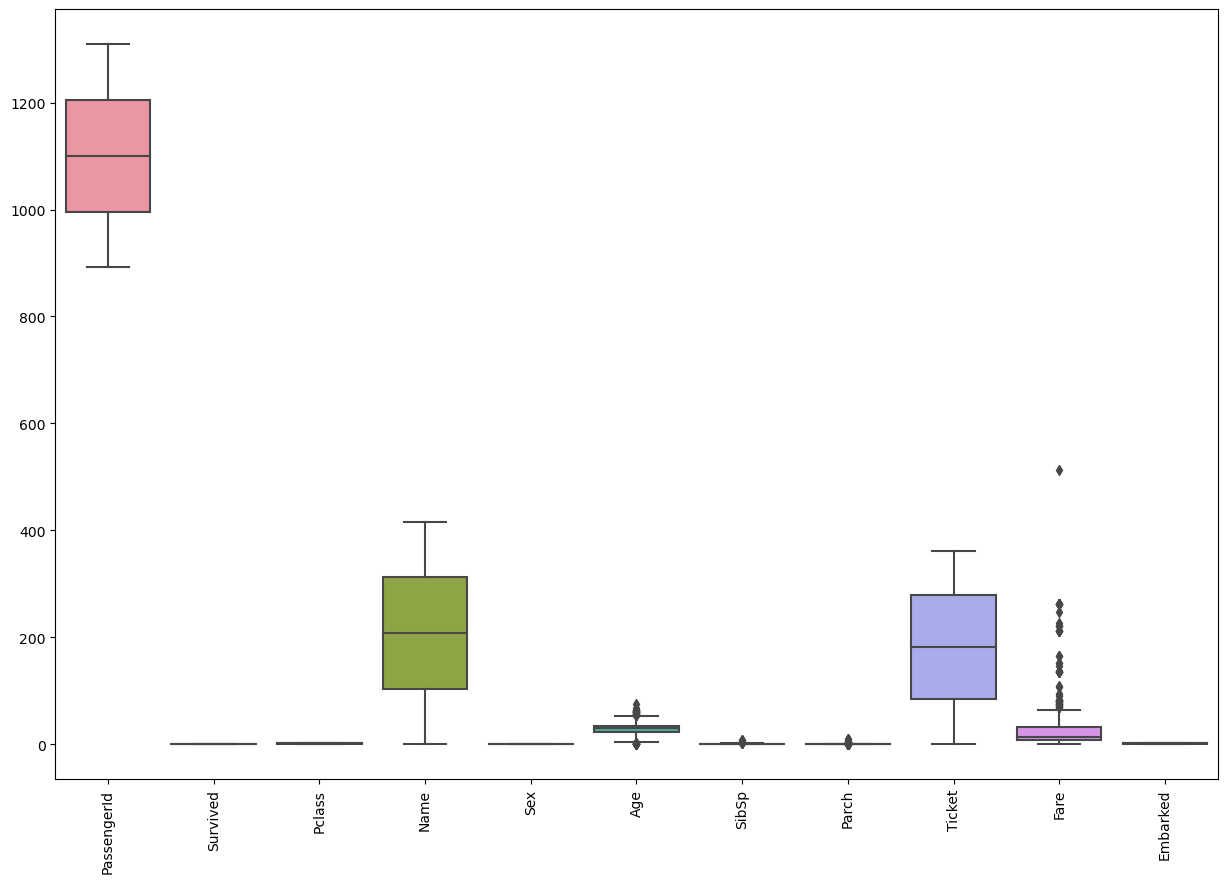

In [12]:
# Create box plots for all columns
plt.figure(figsize=(15, 10))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

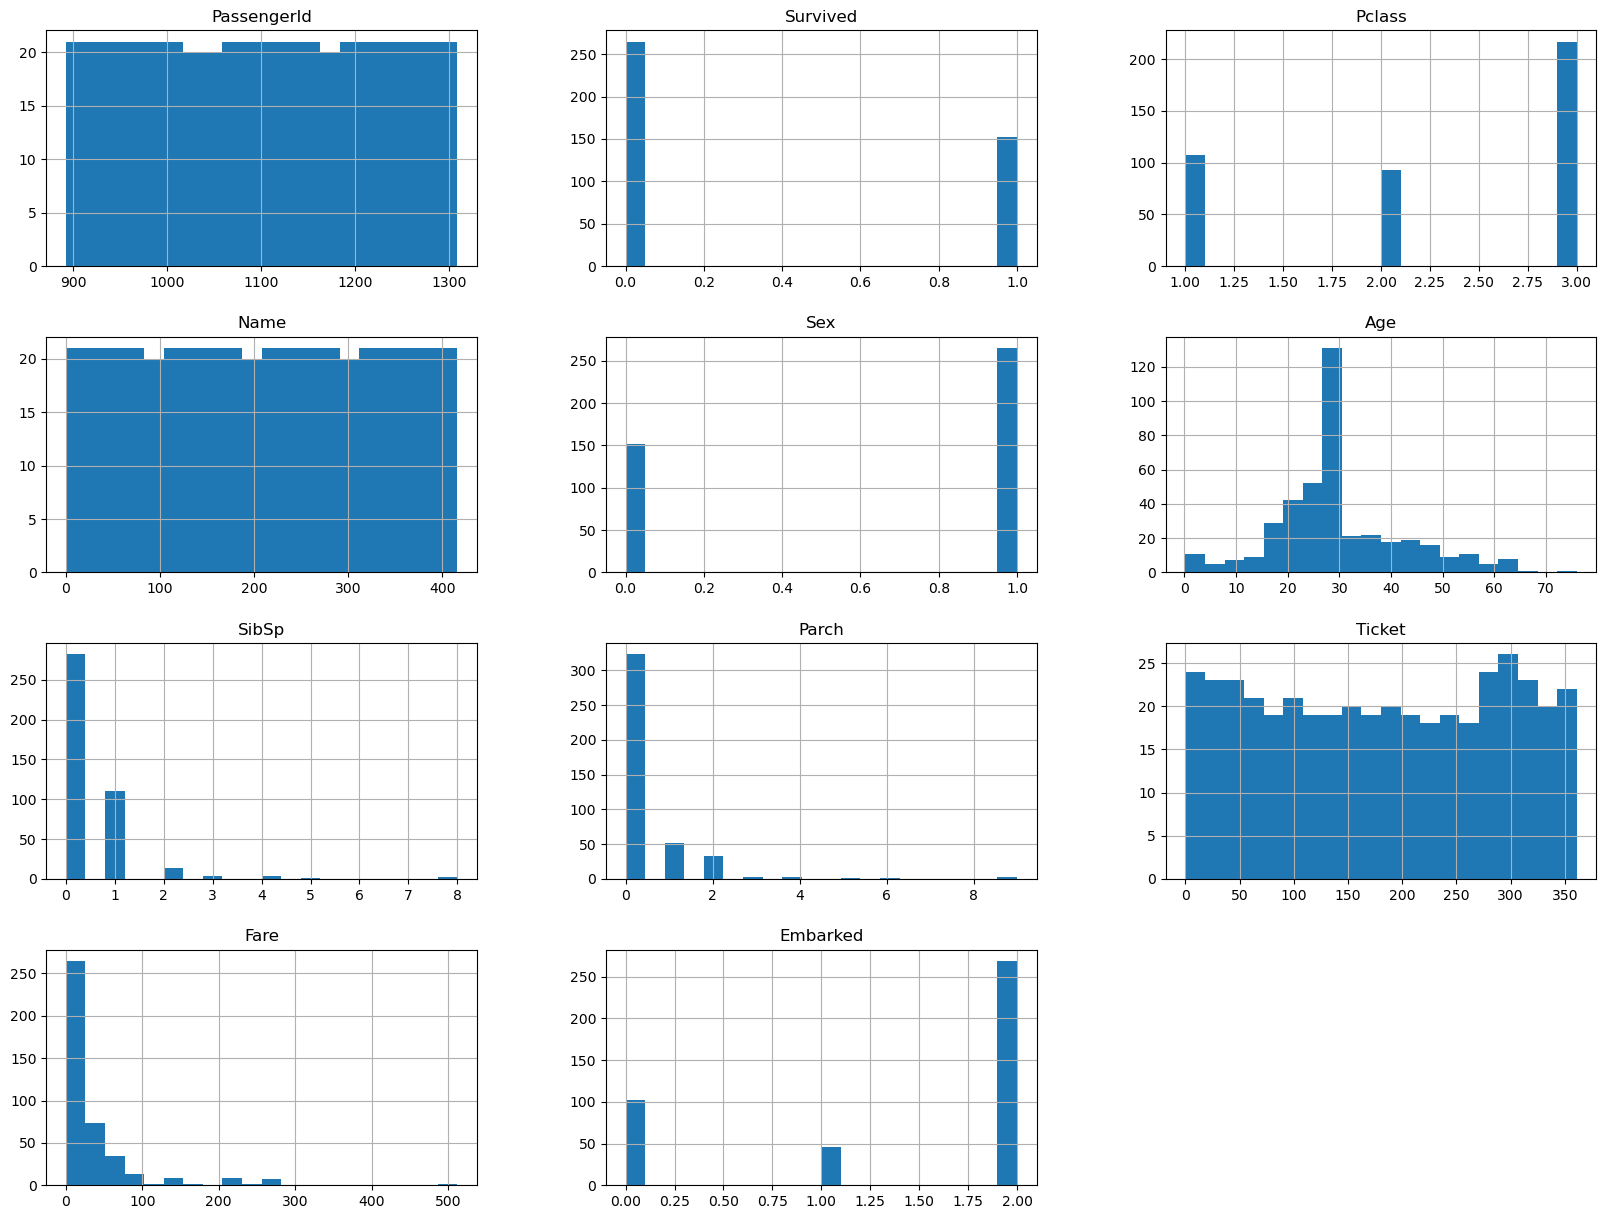

In [13]:
df.hist(bins=20 , figsize = (20 , 15))
plt.show()

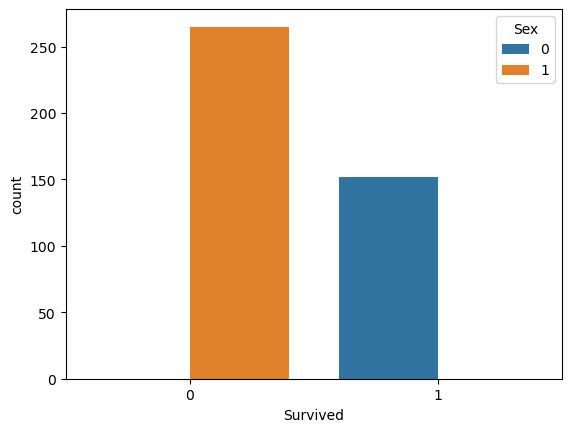

In [14]:
sns.countplot(x ='Survived' , hue = 'Sex' , data = df)
plt.show()

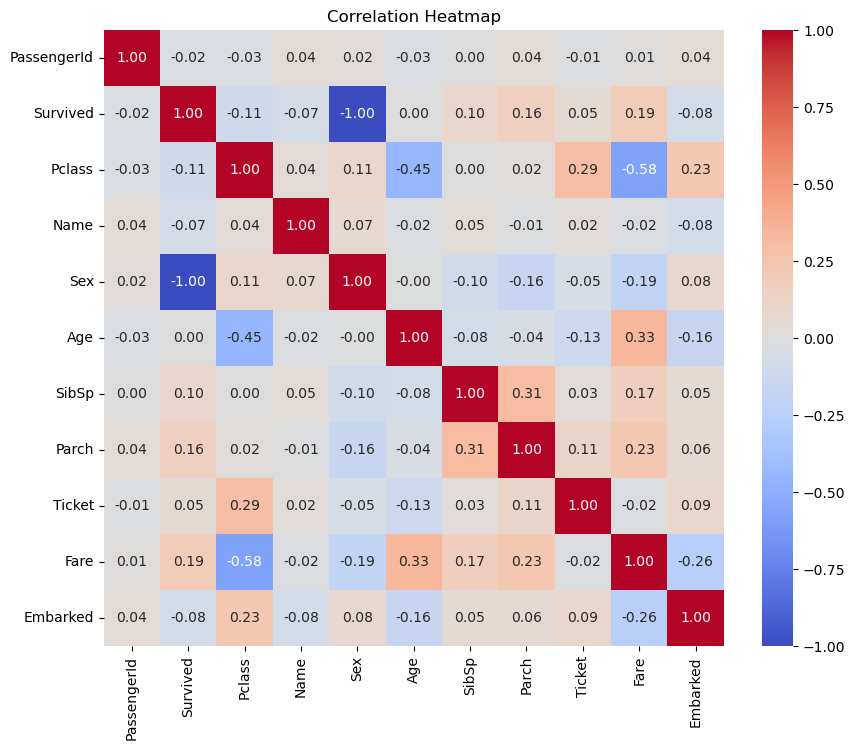

In [15]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

### Data Preprocessing

##### Changing column order

In [16]:
# Reorder columns, moving 'Survived' to the front
new_order = ['Survived'] + [col for col in df.columns if col != 'Survived']
df = df[new_order]

##### Dropping unnecessary columns

In [17]:
df = df.drop(['Name', 'Ticket'], axis=1)
df

,Survived,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,892,3,1,34.50000,0,0,7.8292,1
1,1,893,3,0,47.00000,1,0,7.0000,2
2,0,894,2,1,62.00000,0,0,9.6875,1
3,0,895,3,1,27.00000,0,0,8.6625,2
4,1,896,3,0,22.00000,1,1,12.2875,2
...,...,...,...,...,...,...,...,...,...
413,0,1305,3,1,30.27259,0,0,8.0500,2
414,1,1306,1,0,39.00000,0,0,108.9000,0
415,0,1307,3,1,38.50000,0,0,7.2500,2
416,0,1308,3,1,30.27259,0,0,8.0500,2


### Normalization

In [18]:
df['Survived'].value_counts()

Survived
0    265
1    152
Name: count, dtype: int64

In [19]:
df['Age'].value_counts()

Age
30.27259    86
24.00000    17
21.00000    17
22.00000    16
30.00000    15
            ..
67.00000     1
28.50000     1
22.50000     1
62.00000     1
38.50000     1
Name: count, Length: 79, dtype: int64

In [20]:
df['Fare'].value_counts()

Fare
7.7500     21
26.0000    19
13.0000    17
8.0500     17
7.8958     11
           ..
7.8208      1
8.5167      1
78.8500     1
52.0000     1
22.3583     1
Name: count, Length: 169, dtype: int64

In [21]:
from sklearn.preprocessing import StandardScaler

# Select numerical columns to normalize
numerical_cols = ['Age', 'Fare']

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the selected columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [22]:
### This will standardize the 'Age' and 'Fare' columns to have a mean of 0 and a standard deviation of 1

In [23]:
# Calculate mean and standard deviation of normalized columns
print(df[numerical_cols].mean())
print(df[numerical_cols].std())

Age     2.449413e-17
Fare   -1.916932e-17
dtype: float64
Age     1.001201
Fare    1.001201
dtype: float64


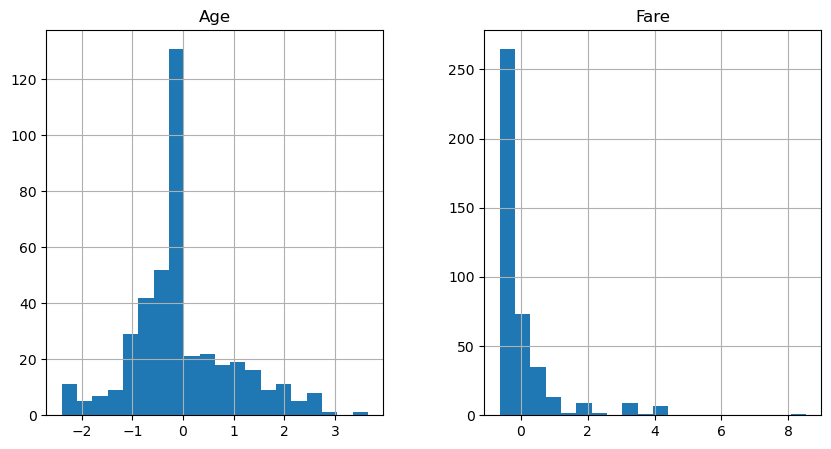

In [24]:
# Plot histograms for normalized features
df[numerical_cols].hist(bins=20, figsize=(10, 5))
plt.show()

<Axes: xlabel='Survived', ylabel='count'>

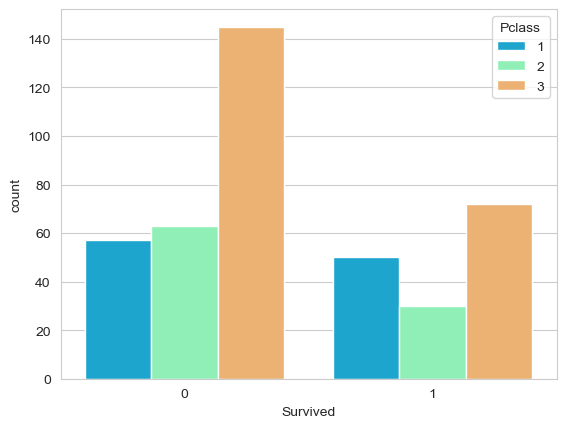

In [25]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=df,palette='rainbow')

<Axes: >

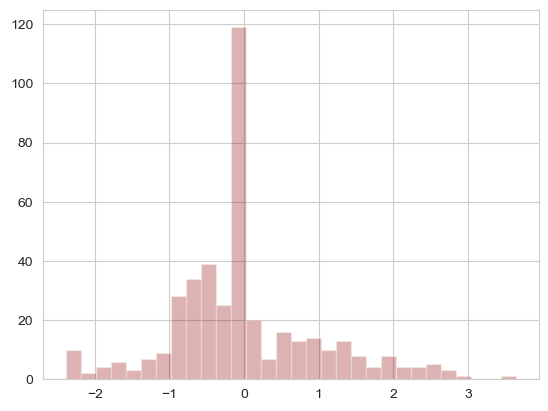

In [26]:
df['Age'].hist(bins=30,color='darkred',alpha=0.3)

<Axes: xlabel='SibSp', ylabel='count'>

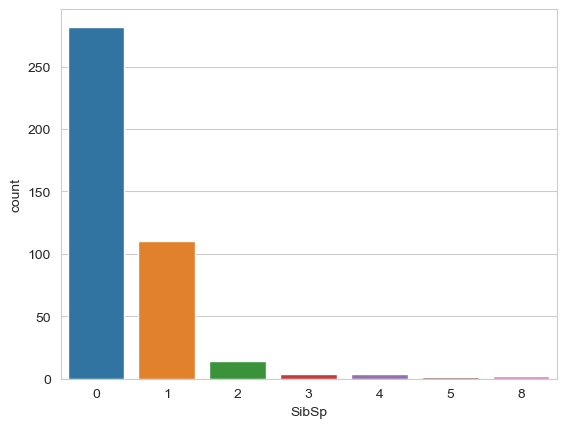

In [27]:
sns.countplot(x='SibSp',data=df)

<Axes: >

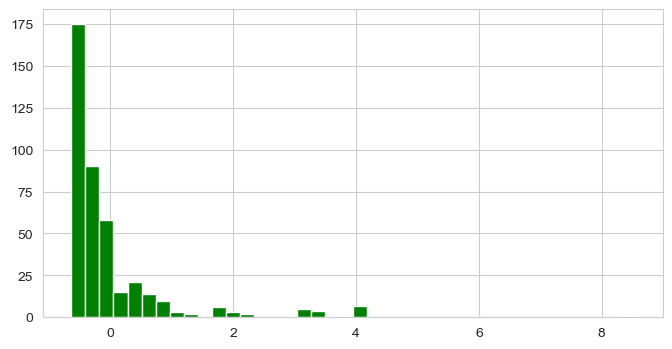

In [28]:
df['Fare'].hist(color='green',bins=40,figsize=(8,4))

<Axes: xlabel='Pclass', ylabel='Age'>

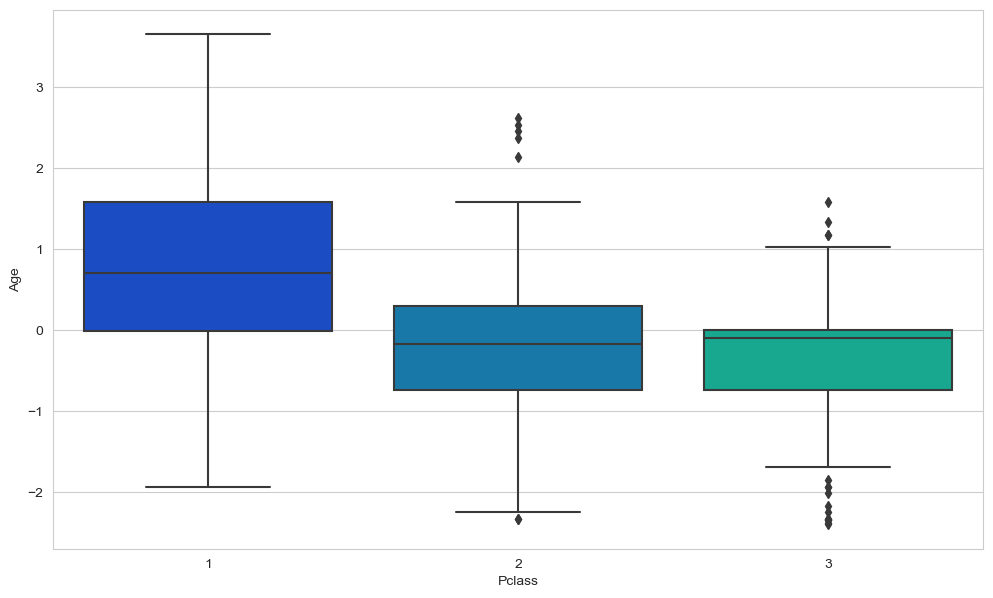

In [29]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Age',data=df,palette='winter')

In [30]:
#Building a Logistic Regression model

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [32]:
X = df.drop("Survived", axis=1).values
Y = df["Survived"].values

In [33]:
X_train, X_test , Y_train , Y_test = train_test_split(X,Y,test_size=0.3, random_state=1)

In [34]:
logisticregression = LogisticRegression(solver='lbfgs', max_iter=3000)

In [35]:
logisticregression.fit(X_train,Y_train)

LogisticRegression(max_iter=3000)

In [36]:
y_pred = logisticregression.predict(X_test)

In [37]:
#Evaluation

In [38]:
from sklearn.metrics import classification_report, confusion_matrix , accuracy_score

In [39]:
print("Classification report :", classification_report(Y_test,y_pred))

Classification report :               precision    recall  f1-score   support

           0       1.00      1.00      1.00        80
           1       1.00      1.00      1.00        46

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



In [40]:
print("Confusion Metrix:")
conf_matrix = confusion_matrix(Y_test,y_pred)
print(conf_matrix)

Confusion Metrix:
[[80  0]
 [ 0 46]]


In [41]:
print("Accuracy score :", accuracy_score(Y_test,y_pred))

Accuracy score : 1.0


In [42]:
print("Training data accuracy:", logisticregression.score(X_train,Y_train))
print("Test data accuracy:", logisticregression.score(X_test,Y_test))

Training data accuracy: 1.0
Test data accuracy: 1.0


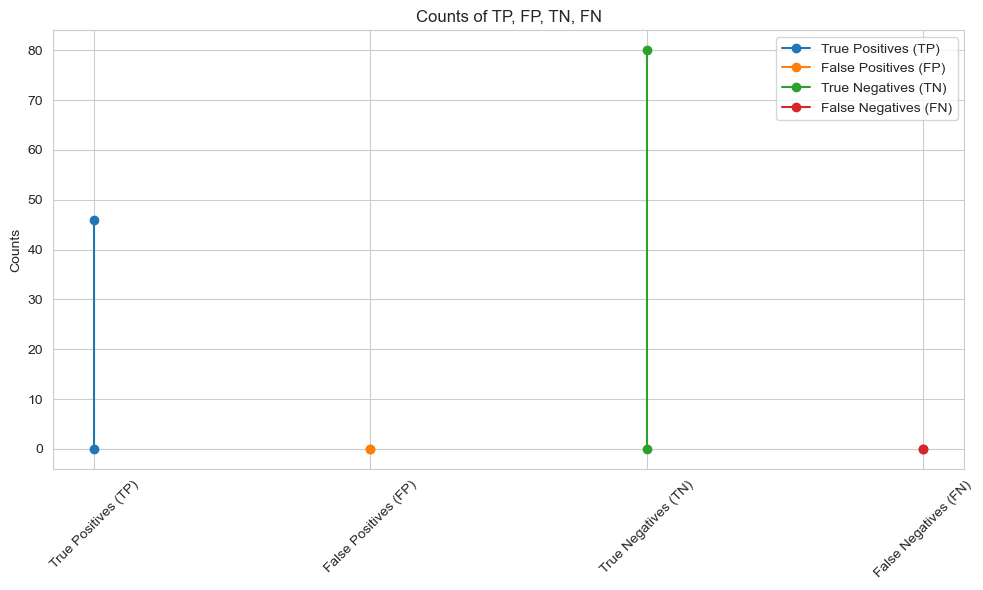

In [43]:
# Assuming conf_matrix is your confusion matrix
# Calculate TP, FP, TN, FN
TP = conf_matrix[1, 1]
FP = conf_matrix[0, 1]
TN = conf_matrix[0, 0]
FN = conf_matrix[1, 0]

# Plotting each metric as a separate line
categories = ['True Positives (TP)', 'False Positives (FP)', 'True Negatives (TN)', 'False Negatives (FN)']
values = [TP, FP, TN, FN]

plt.figure(figsize=(10, 6))

# Plot each line separately
for category, value in zip(categories, values):
    plt.plot([category, category], [0, value], marker='o', label=category)

plt.ylabel('Counts')
plt.title('Counts of TP, FP, TN, FN')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()